In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [5]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
train_data.shape

(1460, 81)

In [10]:
test_data.shape


(1459, 80)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
train_dataset=train_data.copy()
train_dataset=train_dataset.drop(['Fence','MiscFeature','PoolQC','Alley','Id'],axis=1)

In [13]:
test_dataset=test_data.copy()
test_dataset=test_dataset.drop(['Fence','MiscFeature','PoolQC','Alley','Id'],axis=1)

In [14]:
train_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
train_dataset.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
train_dataset.duplicated().sum()

0

In [17]:
missing_values = train_dataset.isnull().sum().sort_values(ascending=False)
missing_values.head(15)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [18]:
train_dataset.dtypes.head(60)

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
1stFlrSF        

In [19]:
train_dataset['LotFrontage'].fillna(train_dataset['LotFrontage'].mean(), inplace=True)
train_dataset['GarageType'].fillna('Unknown',inplace=True)
train_dataset['FireplaceQu'].fillna('Unknown',inplace=True)
train_dataset['GarageYrBlt'].fillna(method='ffill', inplace=True)
train_dataset['GarageFinish'].fillna('Unknown', inplace=True)
train_dataset['GarageQual'].fillna('Unknown', inplace=True)
train_dataset['GarageCond'].fillna('TA', inplace=True)
train_dataset['BsmtFinType2'].fillna('Unknown', inplace=True)
train_dataset['BsmtExposure'].fillna('Unknown', inplace=True)
train_dataset['BsmtFinType1'].fillna('Unknown', inplace=True)
train_dataset['BsmtCond'].fillna('TA', inplace=True)
train_dataset['BsmtQual'].fillna('Unknown', inplace=True)
train_dataset['MasVnrArea'].fillna(train_dataset['MasVnrArea'].mean(), inplace=True)
train_dataset['MasVnrType'].fillna('None', inplace=True)
train_dataset['Electrical'].fillna('SBrkr', inplace=True)

In [20]:
test_dataset['LotFrontage'].fillna(test_dataset['LotFrontage'].mean(), inplace=True)
test_dataset['GarageType'].fillna('Unknown',inplace=True)
test_dataset['FireplaceQu'].fillna('Unknown',inplace=True)
test_dataset['GarageYrBlt'].fillna(method='ffill', inplace=True)
test_dataset['GarageFinish'].fillna('Unknown', inplace=True)
test_dataset['GarageQual'].fillna('Unknown', inplace=True)
test_dataset['GarageCond'].fillna('TA', inplace=True)
test_dataset['BsmtFinType2'].fillna('Unknown', inplace=True)
test_dataset['BsmtExposure'].fillna('Unknown', inplace=True)
test_dataset['BsmtFinType1'].fillna('Unknown', inplace=True)
test_dataset['BsmtCond'].fillna('TA', inplace=True)
test_dataset['BsmtQual'].fillna('Unknown', inplace=True)
test_dataset['MasVnrArea'].fillna(test_dataset['MasVnrArea'].mean(), inplace=True)
test_dataset['MasVnrType'].fillna('None', inplace=True)
test_dataset['Electrical'].fillna('SBrkr', inplace=True)
test_dataset['MSZoning'].fillna('Unknown', inplace=True)
test_dataset['SaleType'].fillna('WD', inplace=True)
test_dataset['Utilities'].fillna('AllPub', inplace=True)
test_dataset['Functional'].fillna('Typ', inplace=True)
test_dataset['Exterior1st'].fillna('VinylSd', inplace=True)
test_dataset['BsmtFullBath'].fillna(test_dataset['BsmtFullBath'].median(), inplace=True)
test_dataset['GarageCars'].fillna(test_dataset['GarageCars'].median(), inplace=True)
test_dataset['BsmtUnfSF'].fillna(test_dataset['BsmtUnfSF'].median(), inplace=True)
test_dataset['BsmtFinSF1'].fillna(test_dataset['BsmtFinSF1'].mean(), inplace=True)
test_dataset['GarageArea'].fillna(test_dataset['GarageArea'].mean(), inplace=True)
test_dataset['TotalBsmtSF'].fillna(test_dataset['TotalBsmtSF'].mean(), inplace=True)
test_dataset['BsmtFinSF2'].fillna(test_dataset['BsmtFinSF2'].min(), inplace=True)
test_dataset['BsmtHalfBath'].fillna(test_dataset['BsmtHalfBath'].min(), inplace=True)
test_dataset['KitchenQual'].fillna('Gd', inplace=True)
test_dataset['Exterior2nd'].fillna('VinylSd', inplace=True)

In [21]:
train_dataset.isnull().sum().sum()

0

In [22]:
test_dataset.isnull().sum().sum()

0

In [23]:
train_dataset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

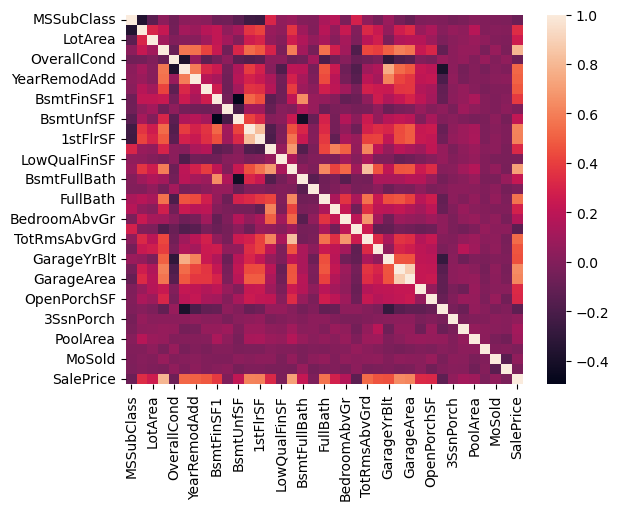

In [24]:
corr = train_dataset.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr)

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_22621/1200587862.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_dataset.corr()[['SalePrice']])


<Axes: >

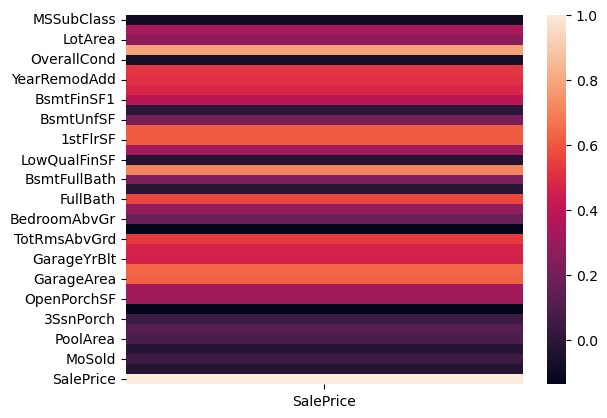

In [25]:
sns.heatmap(train_dataset.corr()[['SalePrice']])

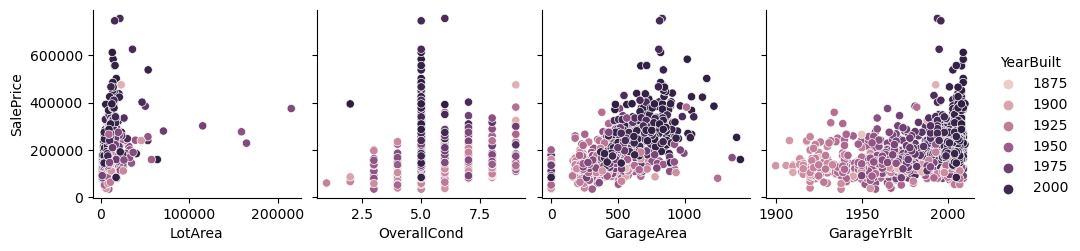

In [26]:
sns.pairplot(train_dataset,x_vars=['LotArea','OverallCond','GarageArea','GarageYrBlt'],y_vars=['SalePrice'],hue='YearBuilt')

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

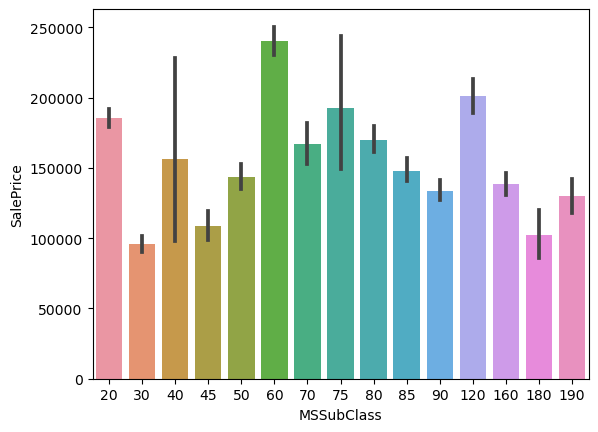

In [27]:
sns.barplot(train_dataset,x="MSSubClass",y="SalePrice")

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

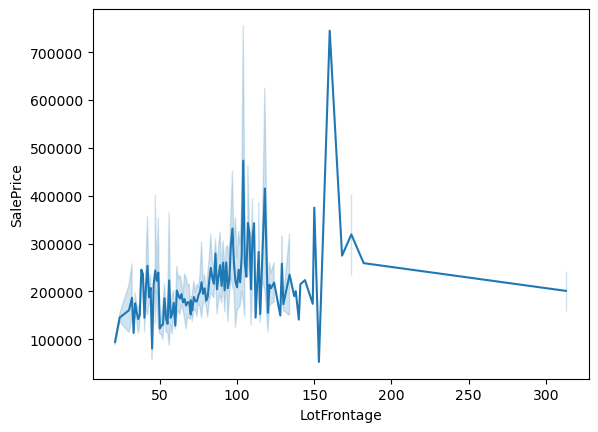

In [28]:
sns.lineplot(train_dataset,x="LotFrontage",y="SalePrice")

<Axes: xlabel='LotArea', ylabel='SalePrice'>

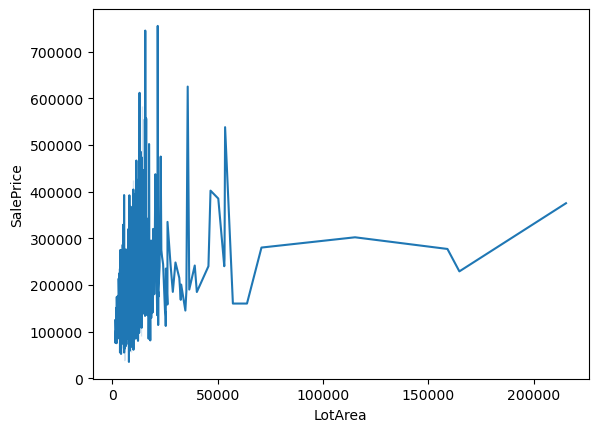

In [29]:
sns.lineplot(train_dataset,x="LotArea",y="SalePrice")

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

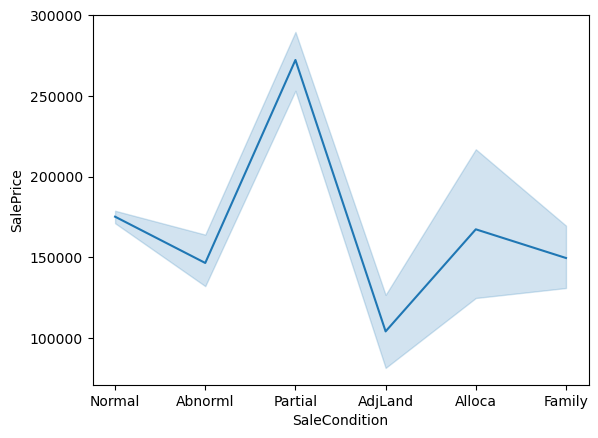

In [30]:
sns.lineplot(train_dataset,x="SaleCondition",y="SalePrice")

In [31]:
# grouping all object column types in order to convert with label encoder
cols=train_dataset.select_dtypes(include=['object']).columns
col=test_dataset.select_dtypes(include=['object']).columns

In [32]:
from sklearn.preprocessing import LabelEncoder

train_dataset[cols] = train_dataset[cols].apply(LabelEncoder().fit_transform)
test_dataset[col] = test_dataset[col].apply(LabelEncoder().fit_transform)

In [33]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [34]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   Utilities      1459 non-null   int64  
 8   LotConfig      1459 non-null   int64  
 9   LandSlope      1459 non-null   int64  
 10  Neighborhood   1459 non-null   int64  
 11  Condition1     1459 non-null   int64  
 12  Condition2     1459 non-null   int64  
 13  BldgType       1459 non-null   int64  
 14  HouseStyle     1459 non-null   int64  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

<Axes: >

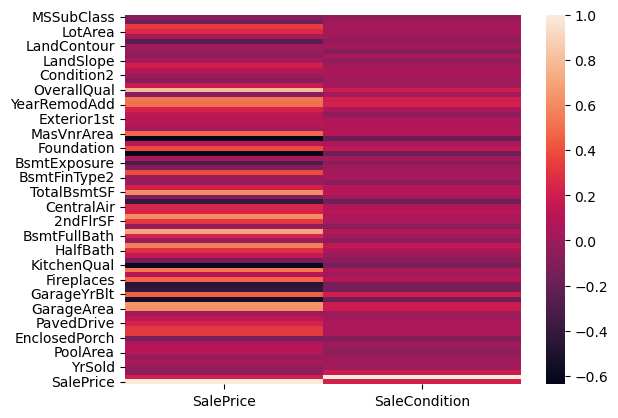

In [35]:
sns.heatmap(train_dataset.corr()[['SalePrice','SaleCondition']])

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

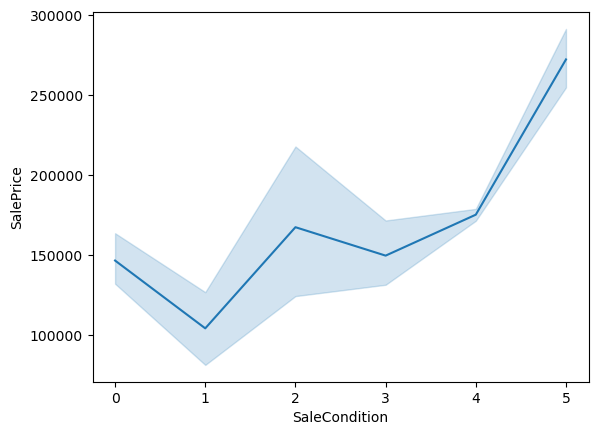

In [36]:
sns.lineplot(train_dataset,x="SaleCondition",y="SalePrice")

In [38]:
# Random forest model using estimator at 10 and sample split at 3

from sklearn.ensemble import RandomForestRegressor

r=RandomForestRegressor(n_estimators=10,min_samples_split=3)

X=train_dataset.drop(['SalePrice'],axis=1)
Y=train_dataset.SalePrice

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

r.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=10)

In [39]:
r.score(x_test,y_test)

0.8618343330610719

In [40]:
test_data['SalePrice']=r.predict(test_dataset)

In [41]:
Submission=test_data[['Id','SalePrice']]

In [42]:
Submission.head()

,Id,SalePrice
0,1461,132583.000000
1,1462,156884.166667
2,1463,179368.200000
3,1464,189498.833333
4,1465,197985.000000
